### Student Information
Name: 張宜榛

Student ID: 109065703

GitHub ID: yakachang

Kaggle name: Yi-Chen Chang

Kaggle Team name: I'm not mean, I'm just real

Kaggle private scoreboard snapshot:

[Snapshot](img/kaggle_private_leaderboard.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## First Part: Take Home Exercises

### >>> Exercise 1 (Take home):
Plot word frequency for Top 30 words in both train and test dataset.

In [1]:
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh   # Custom module
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Load training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### Load testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [3]:
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

train_df['unigrams'] = train_df['unigrams'].apply(lambda x: ' '.join(x))
test_df['unigrams'] = test_df['unigrams'].apply(lambda x: ' '.join(x))

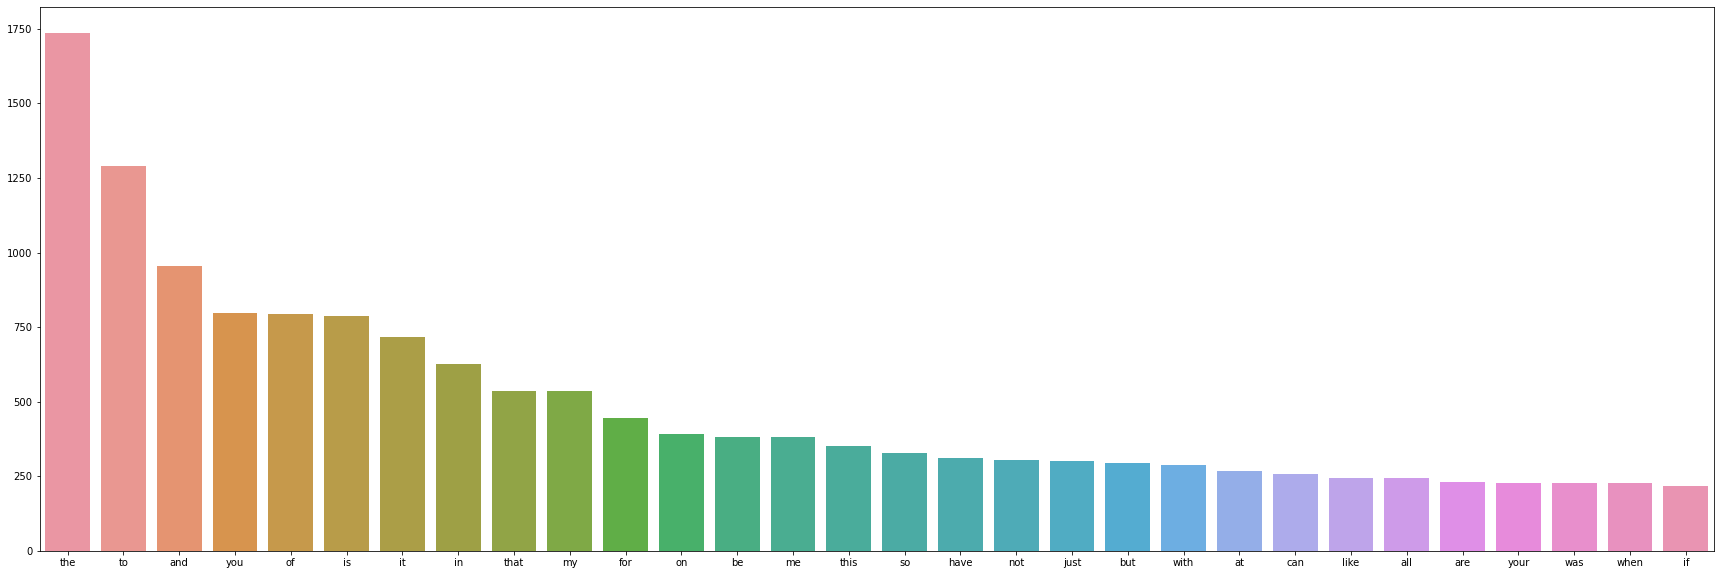

In [4]:
# Word frequency for Top 30 words in training dataset

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df['text'])
count_vect.get_feature_names_out()[0:10]

term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

plt.subplots(figsize=(30, 10))

x_ndarray = count_vect.get_feature_names_out()
y_ndarray = term_frequencies

x_list = x_ndarray.tolist()
y_list = y_ndarray.tolist()

y_list, x_list = zip(*sorted(zip(y_list, x_list), reverse=True))
y_list, x_list = y_list[:30], x_list[:30]

g = sns.barplot(x=np.array(x_list), 
                y=np.array(y_list))
g.set_xticklabels(x_list, rotation = 0);

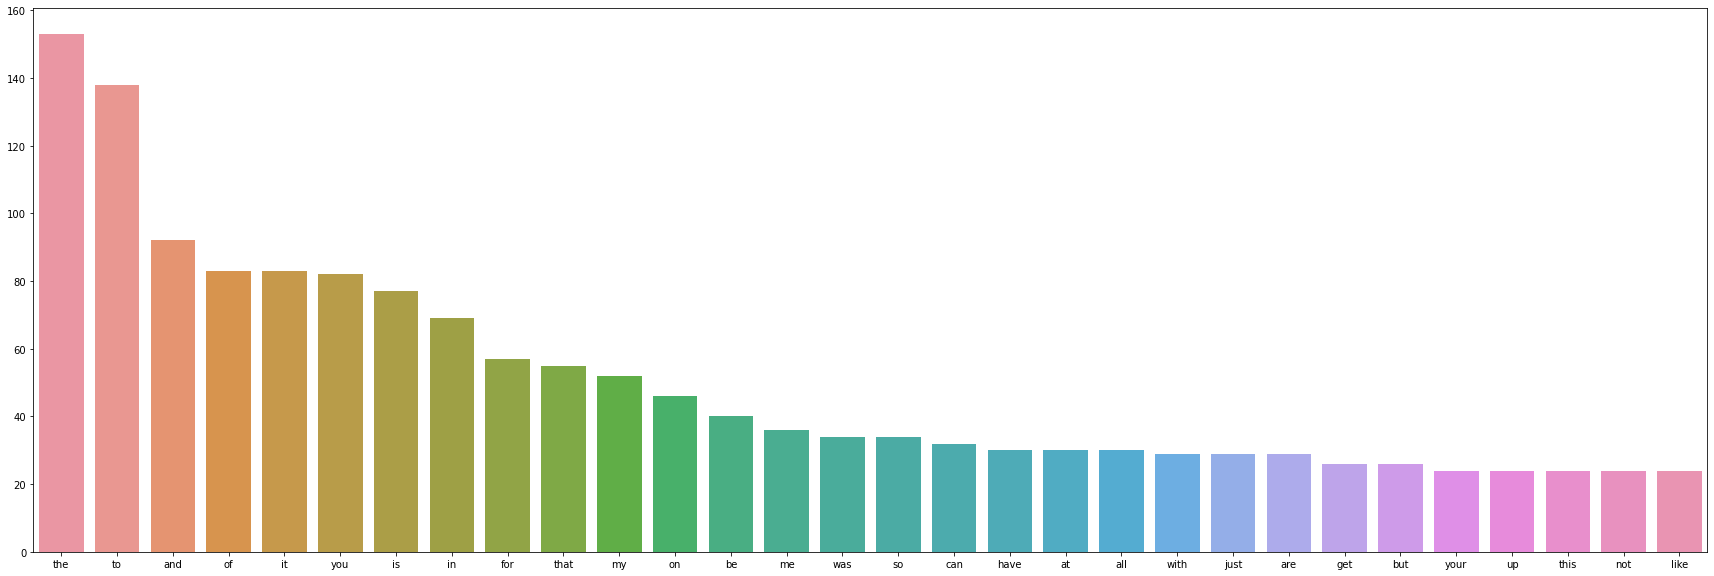

In [5]:
# Word frequency for Top 30 words in testing dataset

count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df['text'])
count_vect.get_feature_names_out()[0:10]

term_frequencies = np.asarray(test_counts.sum(axis=0))[0]

plt.subplots(figsize=(30, 10))

x_ndarray = count_vect.get_feature_names_out()
y_ndarray = term_frequencies

x_list = x_ndarray.tolist()
y_list = y_ndarray.tolist()

y_list, x_list = zip(*sorted(zip(y_list, x_list), reverse=True))
y_list, x_list = y_list[:30], x_list[:30]

g = sns.barplot(x=np.array(x_list), 
                y=np.array(y_list))
g.set_xticklabels(x_list, rotation = 0);

### >>> Exercise 2 (Take home):
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorize = TfidfVectorizer(max_features=1000)
train_tfidf = tfidf_vectorize.fit_transform(train_df['text'])

tfidf_vectorize.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

### >>> Exercise 3 (Take home):
Can you interpret the results above? What do they mean?

#### Answer here
The graph is the visualization of confusion matrix. Since there are 4 emotions, the result is a 4X4 matrix.\
The x-label means the truely answer for each training data (or testing data), and the y-label means the labels the `DT_model` predicted.\
The darker the color, the larger the number.\
As we can see, the larger numbers are on the diangonal line. It represents that the labels the `DT_model` predicted are the same as the true labels in the most cases.

### >>> Exercise 4 (Take home):
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

print("Decision Tree: ")
print("\ttraining accuracy: 0.99\n\ttesting accuracy: 0.65")

print("MultinomialNB: ")

model = MultinomialNB()
print("\t[Training] ")
scores_tfidf = cross_val_score(estimator=model, 
                               X=train_tfidf, y=train_df['emotion'],
                               cv=10, scoring='accuracy')

print("\tscore for tfidf: ", scores_tfidf.mean())

scores_counts = cross_val_score(estimator=model, 
                                X=train_counts, y=train_df['emotion'],
                                cv=10, scoring='accuracy')

print("\tscore for counts: ", scores_counts.mean())

print("\t[Testing] ")
tfidf_vectorize = TfidfVectorizer(max_features=1000)
test_tfidf = tfidf_vectorize.fit_transform(test_df['text'])
scores_tfidf = cross_val_score(estimator=model, 
                               X=test_tfidf, y=test_df['emotion'],
                               cv=10, scoring='accuracy')

print("\tscore for tfidf: ", scores_tfidf.mean())

scores_counts = cross_val_score(estimator=model, 
                                X=test_counts, y=test_df['emotion'],
                                cv=10, scoring='accuracy')

print("\tscore for counts: ", scores_counts.mean())

Decision Tree: 
	training accuracy: 0.99
	testing accuracy: 0.65
MultinomialNB: 
	[Training] 
	score for tfidf:  0.7630377557735571
	score for counts:  0.8026216311351219
	[Testing] 
	score for tfidf:  0.5249579831932774
	score for counts:  0.5278151260504201


### >>> Exercise 5 (Take home):

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer Here
Generally, the performance of `Naive Bayes` is better than `Decision Tree` since its TP value is higher.\
Moreover, there is overfitting problem in `Decision Tree` model since the training accuracy is up to 99%, yet, its testing accuracy is only 65%.\
I think the possible reason is that `MultinominalNB` doesn't need large dataset for training, however, the `Decision Tree` needs a large dataset to avoid overfitting problem.

### >>> Exercise 6 (Take home):

1. Plot the Training and Validation Accuracy and Loss (different plots).
2. How to interpret the graphs you got?
3. How are they related to the concept of overfitting/underfitting covered in class?

In [8]:
# Load the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

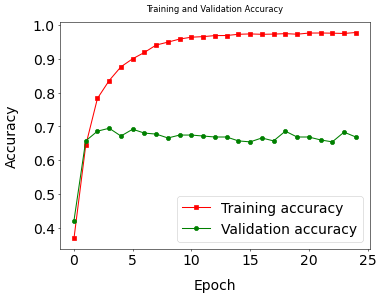

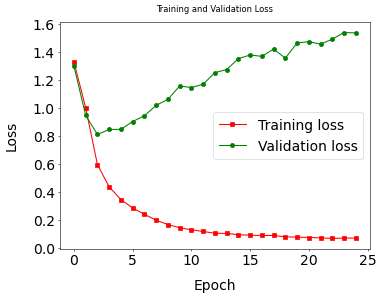

In [9]:
import matplotlib.pyplot as plt

epoch = training_log['epoch']
train_accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']

plt.figure(figsize=(8, 6), dpi=50, linewidth=2)

plt.plot(epoch, train_accuracy, 's-', color='r', label="Training accuracy")
plt.plot(epoch, val_accuracy, 'o-', color='g', label="Validation accuracy")

plt.title("Training and Validation Accuracy", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Epoch", fontsize=20, labelpad=15)
plt.ylabel("Accuracy", fontsize=20, labelpad=20)
plt.legend(loc = "best", fontsize=20)

plt.show()


epoch = training_log['epoch']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

plt.figure(figsize=(8, 6), dpi=50, linewidth=2)

plt.plot(epoch, train_loss, 's-', color='r', label="Training loss")
plt.plot(epoch, val_loss, 'o-', color='g', label="Validation loss")

plt.title("Training and Validation Loss", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Epoch", fontsize=20, labelpad=15)
plt.ylabel("Loss", fontsize=20, labelpad=20)
plt.legend(loc="best", fontsize=20)

plt.show()

### >>> Exercise 7 (Take home):

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).\
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Answer Here

In [10]:
from gensim.models import KeyedVectors

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

#### Method 1: Utilize `the average of word vectors` to represent sentences.

In [11]:
# Code for method 1
sentence = train_df['text'][0]
print("Original sentence: ", sentence)

embedding = []
for token in sentence.split():
    if token in w2v_google_model:
        embedding.append(w2v_google_model[token])

word_embed_list = np.stack(embedding)

sentence_embed = [sum(i)/len(word_embed_list) for i in zip(*word_embed_list)]     # sum list of lists
print("Sentence Embedding: \n", np.array(sentence_embed))

Original sentence:  How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
Sentence Embedding: 
 [ 0.0771548   0.06631215  0.06015094  0.11211141 -0.02234904 -0.03615316
  0.02254105 -0.0332133   0.08024597  0.06206512  0.00553195 -0.10456848
 -0.04009628 -0.01324463 -0.13285319  0.05147298  0.08373515  0.02573649
  0.00655365  0.0161438  -0.01954651  0.04020182  0.08944194 -0.05538368
  0.01194255  0.03275744 -0.10600535  0.02733378  0.03970973  0.01224009
 -0.01147461  0.01746496 -0.04799398 -0.04284922  0.04045836  0.05672201
  0.03815715  0.03690592  0.03976949  0.09390513  0.0046196  -0.05332184
  0.15692139 -0.05361938  0.01901754  0.00291824 -0.02730815 -0.04903158
  0.01450094  0.01420593 -0.05381266  0.11316427  0.0290273  -0.03146362
  0.02683004  0.03585561 -0.05706787 -0.03864288  0.02395121 -0.03595988
 -0.00998942  0.06491089 -0.08591715 -0.03338114 -0.03612264 -0.03524399
 -0.01267115  0.08040365 -0.03734271  0.0689799   0.072835

#### Method 2: Convert each word in sentences to word embedding, and ask model to generate sentence vectors
You can modify the variable `sentence` in the following code to see the embeddings for each sentence.

In [12]:
# Code for method 2
import nltk
import re
import numpy as np

stopwords = nltk.corpus.stopwords.words('english')

def preprocess(text):
    text = text.lower()
    tokens = []
    for token in re.findall('[\w]+', text):
        if token not in stopwords and re.match('[a-zA-Z]+', token):
            tokens.append(token)

    return tokens

def to_embedding(tokens):
    embedding = []
    for token in tokens:
        if token in w2v_google_model:
            embedding.append(w2v_google_model[token])

    embedding = np.stack(embedding)
    
    return embedding

# You can modify the following sentence
sentence = train_df['text'][0]
print("Original sentence: ", sentence)
embeddings = to_embedding(preprocess(sentence))
print("After embedding for each word: \n", embeddings)

Original sentence:  How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
After embedding for each word: 
 [[-0.01556396  0.06201172  0.16308594 ... -0.24316406 -0.13085938
   0.33398438]
 [ 0.04077148 -0.17871094  0.2265625  ...  0.08886719 -0.11572266
   0.23144531]
 [ 0.17285156 -0.09277344  0.06591797 ... -0.17578125  0.01574707
  -0.08544922]
 ...
 [ 0.09619141 -0.02661133  0.07910156 ... -0.08691406 -0.08984375
   0.03088379]
 [ 0.22265625  0.08789062  0.12597656 ...  0.08886719  0.0859375
   0.04248047]
 [ 0.05541992 -0.05664062  0.15039062 ...  0.14648438 -0.05175781
   0.11669922]]


### >>> Exercise 8 (Take home):

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [13]:
words = [ "angry", "happy", "sad", "fear" ]

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

hw_target_words = happy_words + angry_words + sad_words + fear_words
print('\nhw_target words: ')
print(hw_target_words)

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

hw_target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hi

/home/nlplab/yichen/anaconda3/envs/nlp-course/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nlplab/yichen/anaconda3/envs/nlp-course/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/nlplab/yichen/anaconda3/envs/nlp-course/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


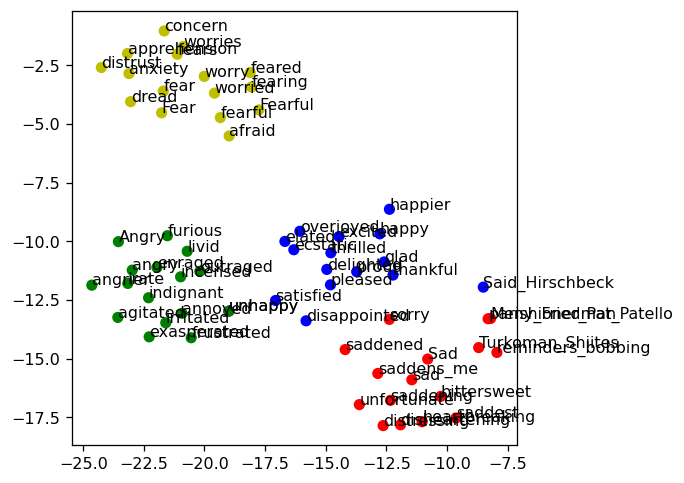

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(hw_target_words)
all_word = list(model.key_to_index.keys())
word_train = hw_target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(5, 5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(hw_target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second Part: Kaggle competition

## Third Part: Report of Kaggle Competition